<a href="https://colab.research.google.com/github/parmidamardi/CDM_TA_5/blob/main/CDM_TA_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Section 1

In [ ]:
#step 1.1

In [7]:
import pandas as pd

X = pd.read_csv(
    "https://raw.githubusercontent.com/parmidamardi/CDM_TA_5/refs/heads/main/secom.data",
    sep=" ",
    header=None
)

y = pd.read_csv(
    "https://raw.githubusercontent.com/parmidamardi/CDM_TA_5/refs/heads/main/secom_labels.data",
    header=None
)

In [8]:
print(X.shape)
print(y.shape)


(1567, 590)
(1567, 1)


In [9]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=0.0)
X_no_const = vt.fit_transform(X)


In [10]:
print("Original features:", X.shape[1])
print("Remaining features:", X_no_const.shape[1])
print("Removed zero-variance features:", X.shape[1] - X_no_const.shape[1])


Original features: 590
Remaining features: 474
Removed zero-variance features: 116


In [11]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X_no_const)


In [12]:
print("Remaining NaNs:", np.isnan(X_imputed).sum())


Remaining NaNs: 0


In [13]:
#step 1.2

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


In [15]:
import numpy as np

print(np.mean(X_scaled, axis=0)[:5])
print(np.std(X_scaled, axis=0)[:5])

[ 1.62332035e-15 -5.07372631e-15 -5.71336214e-15 -1.26963603e-16
  0.00000000e+00]
[1. 1. 1. 1. 1.]


In [16]:
#Section 2

In [17]:
#step 2.1

In [54]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import numpy as np
import time


y_vec = y.values.ravel()

start_time = time.time()

mi_scores = mutual_info_classif(
    X_scaled,
    y_vec,
    random_state=42
)

end_time = time.time()
mi_time = end_time - start_time
print(f"MI execution time: {mi_time:.4f} seconds")


selected_columns = X.columns[vt.get_support()]

mi_series = pd.Series(
    mi_scores,
    index=selected_columns
)

mi_series_sorted = mi_series.sort_values(ascending=False)



MI execution time: 44.9822 seconds


In [55]:
mi_top20 = mi_series_sorted.head(20)
print(mi_top20)

249    3.041678
521    2.884178
387    2.805427
342    2.419387
114    2.411677
347    2.336227
492    2.329185
109    2.134876
478    2.101210
209    2.031040
111    1.968667
358    1.943389
220    1.801318
74     1.794580
293    1.739683
245    1.718231
85     1.692480
110    1.664892
124    1.653061
586    1.609216
dtype: float64


In [27]:
#step 2.2

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import time

X_scaled_df = pd.DataFrame(
    X_scaled,
    columns=X.columns[vt.get_support()]
)

rf = RandomForestClassifier(
    n_estimators=30,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rfe = RFE(
    estimator=rf,
    n_features_to_select=20,
    step=20
)


In [121]:
start_time = time.time()
rfe.fit(X_scaled_df, y_vec)
end_time = time.time()

print(f"RFE execution time: {end_time - start_time:.2f} seconds")


RFE execution time: 156.62 seconds


In [122]:
rfe_features = X_scaled_df.columns[rfe.get_support()]

rfe_top20 = pd.Series(
    data=np.arange(1, 21),
    index=rfe_features[:20],
    name="RFE_Rank"
)

print("Top 20 features selected by RFE :")
print(rfe_top20)

Top 20 features selected by RFE :
21      1
28      2
30      3
99      4
137     5
146     6
298     7
300     8
302     9
310    10
324    11
349    12
353    13
361    14
362    15
386    16
440    17
457    18
510    19
578    20
Name: RFE_Rank, dtype: int64


In [61]:
#Section 3

In [70]:
#step 3.1 and 3.2 and 3.3

In [71]:
start_time = time.perf_counter()

U, S, VT = np.linalg.svd(X_scaled, full_matrices=False)

k = 20
sigma_squared = S[:k] ** 2
V_k = VT[:k, :]

svd_scores = np.sum(
    sigma_squared[:, np.newaxis] * np.abs(V_k),
    axis=0
)

svd_scores_series = pd.Series(
    svd_scores,
    index=X_scaled_df.columns,
    name="SVD_Score"
).sort_values(ascending=False)

top_20_svd_features = svd_scores_series.head(20)

end_time = time.perf_counter()

svd_time = end_time - start_time

print("Top 20 SVD features:")
print(top_20_svd_features)
print(f"\nSVD Feature Selection Time: {svd_time:.4f} seconds")


Top 20 SVD features:
209    14723.591277
478    14723.591277
347    14723.591277
206    14723.591277
342    14723.591277
74     14723.591277
62     14714.025063
303    13726.571557
338    13725.257912
202    13724.940301
168    13413.364582
267    13276.941610
405    13251.482191
440    13212.823411
539    13179.863070
339    13122.782942
336    13093.166187
46     13054.120095
406    12932.253017
304    12916.250949
Name: SVD_Score, dtype: float64

SVD Feature Selection Time: 0.4749 seconds


In [72]:
#Section 4

In [73]:
#step 4.1

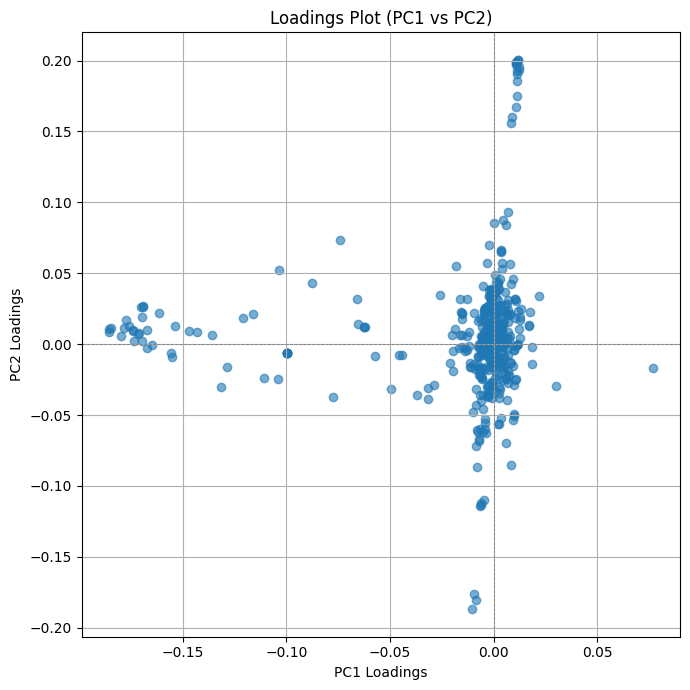

In [87]:
import matplotlib.pyplot as plt

V = VT.T

pc1 = V[:, 0]
pc2 = V[:, 1]

plt.figure(figsize=(7, 7))
plt.scatter(pc1, pc2, alpha=0.6)

plt.axhline(0, color='gray', linestyle='--', linewidth=0.6)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.6)

plt.xlabel("PC1 Loadings")
plt.ylabel("PC2 Loadings")
plt.title("Loadings Plot (PC1 vs PC2)")
plt.grid(True)
plt.tight_layout()
plt.show()


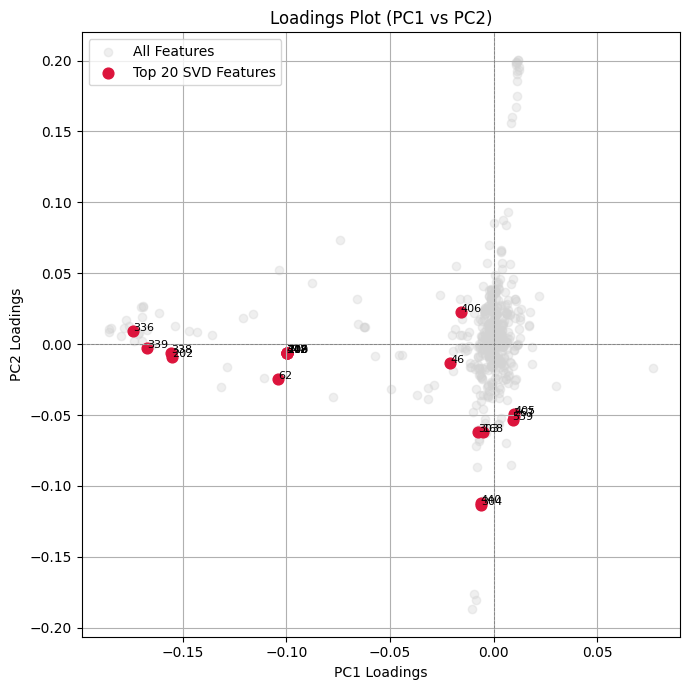

In [89]:
feature_names = X_scaled_df.columns.to_numpy()

top20_mask = np.isin(feature_names, top_20_svd_features.index)

plt.figure(figsize=(7, 7))

plt.scatter(
    pc1,
    pc2,
    color='lightgray',
    alpha=0.35,
    label='All Features'
)

plt.scatter(
    pc1[top20_mask],
    pc2[top20_mask],
    color='crimson',
    s=60,
    label='Top 20 SVD Features'
)

for x, y, name in zip(
    pc1[top20_mask],
    pc2[top20_mask],
    feature_names[top20_mask]
):
    plt.text(x, y, name, fontsize=8)

plt.axhline(0, color='gray', linestyle='--', linewidth=0.6)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.6)

plt.xlabel("PC1 Loadings")
plt.ylabel("PC2 Loadings")
plt.title("Loadings Plot (PC1 vs PC2)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [90]:
#step 4.2

In [110]:
np.random.seed(42)

noise = 0.05 * np.std(X_scaled, axis=0) * np.random.randn(*X_scaled.shape)
X_noisy = X_scaled + noise

X_noisy_df = pd.DataFrame(
    X_noisy,
    columns=X.columns[vt.get_support()]
)

In [111]:
U, S, VT = np.linalg.svd(X_noisy, full_matrices=False)

k = 20
sigma_squared = S[:k] ** 2
V_k = VT[:k, :]

svd_scores = np.sum(
    sigma_squared[:, np.newaxis] * np.abs(V_k),
    axis=0
)

svd_scores_series = pd.Series(
    svd_scores,
    index=X_noisy_df.columns,
    name="SVD_Score"
).sort_values(ascending=False)

svd_top20_noisy = svd_scores_series.head(20)

print("Top 20 features selected by SVD after adding 5% random noise:")
print(svd_top20_noisy)


Top 20 features selected by SVD after adding 5% random noise:
62     14707.270454
206    14655.072134
342    14641.278726
478    14640.853732
347    14635.852400
209    14633.106695
74     14615.773216
303    13707.858139
338    13666.539125
202    13654.242863
168    13417.603164
267    13369.570287
405    13326.229880
539    13230.911848
440    13179.079034
339    13113.406517
336    13056.964037
46     12967.308270
406    12947.680873
304    12887.221967
Name: SVD_Score, dtype: float64


In [123]:
rfe.fit(X_noisy_df, y_vec)



RFE(estimator=RandomForestClassifier(max_depth=10, n_estimators=30, n_jobs=-1,
                                     random_state=42),
    n_features_to_select=20, step=20)

In [124]:
rfe_noisy_features = X_noisy_df.columns[rfe.get_support()]

rfe_top20_noisy = pd.Series(
    data=np.arange(1, 21),
    index=rfe_noisy_features[:20],
    name="RFE_Rank"
)

print("Top 20 features selected by RFE after adding 5% random noise:")
print(rfe_top20_noisy)

Top 20 features selected by RFE after adding 5% random noise:
1       1
34      2
110     3
146     4
164     5
171     6
174     7
184     8
251     9
286    10
289    11
302    12
359    13
362    14
388    15
409    16
434    17
446    18
485    19
562    20
Name: RFE_Rank, dtype: int64


In [130]:
def compare_topk(clean, noisy, k=20):
    clean_set = set(clean.index if hasattr(clean, "index") else clean)
    noisy_set = set(noisy.index if hasattr(noisy, "index") else noisy)

    intersection = clean_set.intersection(noisy_set)

    overlap = len(intersection)
    overlap_pct = overlap / k * 100
    change_pct = 100 - overlap_pct

    return overlap, overlap_pct, change_pct, intersection


In [131]:
svd_overlap, svd_overlap_pct, svd_change_pct, svd_common = compare_topk(
    top_20_svd_features,
    svd_top20_noisy
)


In [132]:
rfe_overlap, rfe_overlap_pct, rfe_change_pct, rfe_common = compare_topk(
    rfe_top20,
    rfe_top20_noisy
)


In [133]:
stability_df = pd.DataFrame({
    "Method": ["SVD", "RFE"],
    "Overlap (Top-20)": [svd_overlap, rfe_overlap],
    "Overlap (%)": [svd_overlap_pct, rfe_overlap_pct],
    "Change (%)": [svd_change_pct, rfe_change_pct]
})

stability_df.set_index("Method", inplace=True)
stability_df


,Overlap (Top-20),Overlap (%),Change (%)
Method,,,
SVD,20,100.0,0.0
RFE,3,15.0,85.0
